<a href="https://colab.research.google.com/github/stephintoto/Accident-Prediction/blob/main/Cluster_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


[link text](https://drive.google.com/file/d/1-B9_4TejXZfuiFnTTm0I5-t39mX1IqLB/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/modified_final_data.csv")

In [ ]:
df.head()

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
0,KOLLAM CITY,Eravipuram,5653/2023,2023-01-06,2023-09-27,17:33:33,00:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Car,Lorry,2109,8.865654,76.607678,"Polayathaodu, Kollam, Kerala, 691001, India",2023-09-27 00:00:00,0,0-3
1,ERNAKULAM CITY,Kalamassery,6992/2023,2023-01-20,2023-01-19,18:42:00,00:15:00,"279,338",Grevious Injury,0,...,Police controlled,Car,Lorry,2423,10.029299,76.305734,"Skyline Road, Sahrudaya Nagar, Edapally, Ernak...",2023-01-19 00:15:00,0,0-3
2,THRISSUR RURAL,Irinjalakkuda,7869/2023,2023-01-24,2023-01-10,16:43:00,01:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Mini Lorry,Motor Cycle,2311,10.345686,76.216873,"Daivamakkal Prarthanalayam, Daivamakkal Road, ...",2023-01-10 01:00:00,1,0-3
3,PALAKKAD,Mannarkkad,8665/2022,2023-01-06,2023-01-06,17:00:00,01:30:00,"279,337",Minor Injury,0,...,Uncontrolled,Car,Scooter,1237,10.985304,76.483019,"Palakkad-Malappuram-Calicut Road, Kottiyode, M...",2023-01-06 01:30:00,1,0-3
4,ALAPPUZHA,Chengannur,6092/2023,2023-01-21,2023-01-16,16:30:00,01:15:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Car,2504,9.282013,76.654424,"Karakkad, Chengannur, Alappuzha, Kerala, 68950...",2023-01-16 01:15:00,1,0-3


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            50000 non-null  object 
 1   PS Name             50000 non-null  object 
 2   FIR No              50000 non-null  object 
 3   Date Report         50000 non-null  object 
 4   Date Accident       50000 non-null  object 
 5   Time Report         50000 non-null  object 
 6   Time Accident       50000 non-null  object 
 7   Sections            50000 non-null  object 
 8   Accident type       50000 non-null  object 
 9   Death               50000 non-null  int64  
 10  Grievous            50000 non-null  int64  
 11  Minor               50000 non-null  int64  
 12  Pedestrian          50000 non-null  int64  
 13  Cyclist             50000 non-null  int64  
 14  Latitude            50000 non-null  float64
 15  Longitude           50000 non-null  float64
 16  Plac

In [ ]:
df.shape

(50000, 38)

In [ ]:
df.isna().sum()

,0
District,0
PS Name,0
FIR No,0
Date Report,0
Date Accident,0
Time Report,0
Time Accident,0
Sections,0
Accident type,0
Death,0


In [ ]:

df['T -Junction'] = df['T -Junction'].fillna('Unknown')
print(df['T -Junction'].isnull().sum())


0


In [ ]:

df['Date Accident'] = df['Date Accident'].astype(str)
df['Time Accident'] = df['Time Accident'].astype(str)


df['Datetime'] = pd.to_datetime(df['Date Accident'] + ' ' + df['Time Accident'], errors='coerce')


print(df[['Date Accident', 'Time Accident', 'Datetime']].head())


  Date Accident Time Accident            Datetime
0    2023-09-27      00:00:00 2023-09-27 00:00:00
1    2023-01-19      00:15:00 2023-01-19 00:15:00
2    2023-01-10      01:00:00 2023-01-10 01:00:00
3    2023-01-06      01:30:00 2023-01-06 01:30:00
4    2023-01-16      01:15:00 2023-01-16 01:15:00


In [ ]:
df['Hour'] = df['Datetime'].dt.hour

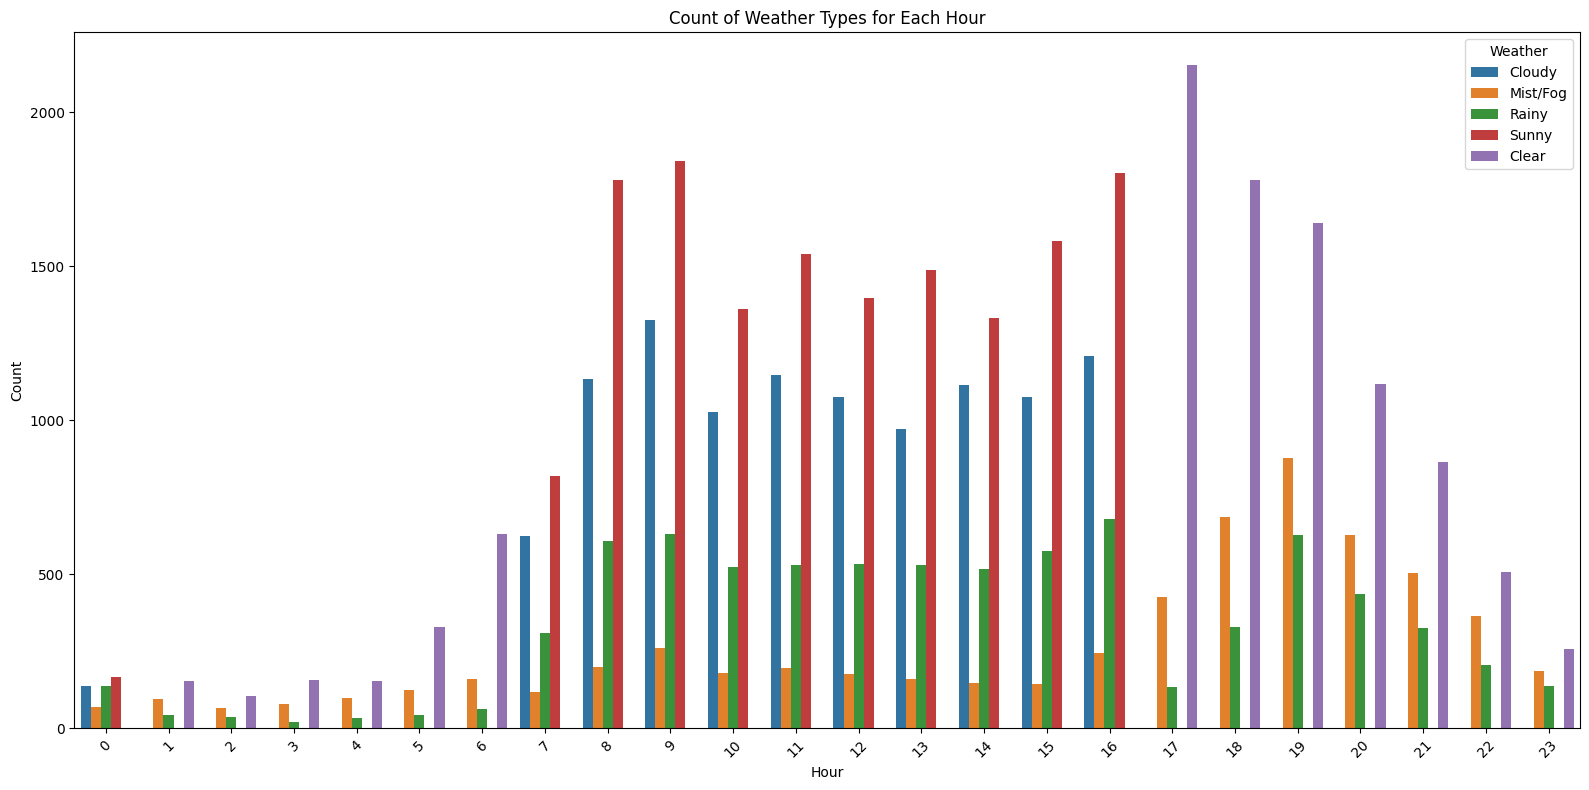

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Hour' and 'Weather' and count the occurrences
weather_counts = df.groupby(['Hour', 'Weather']).size().reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(16, 8))
sns.barplot(data=weather_counts, x='Hour', y='Count', hue='Weather', palette="tab10")
plt.title("Count of Weather Types for Each Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Weather", loc="upper right")
plt.tight_layout()
plt.show()


<ipython-input-12-d9309e243ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather', palette='viridis', order=df['Weather'].value_counts().index)


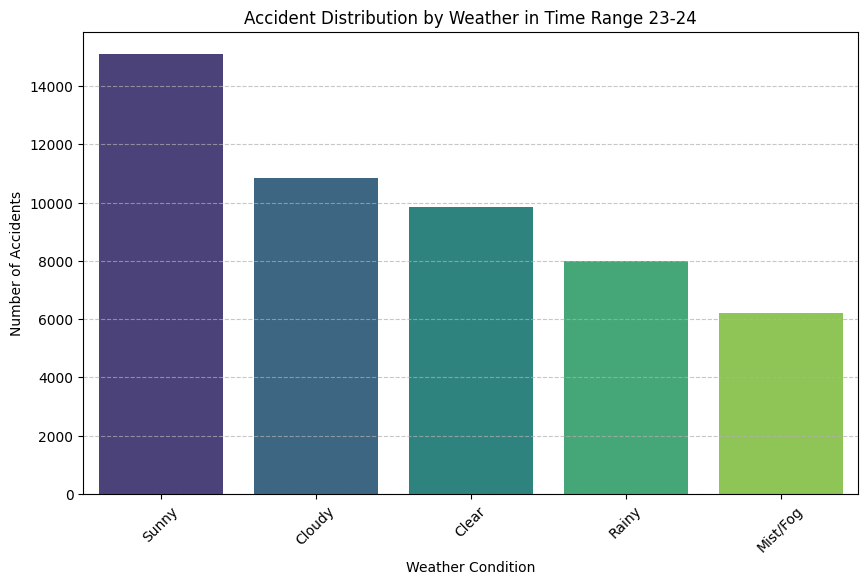

In [ ]:
# Create a bar plot for weather conditions in the 23-24 time range
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', palette='viridis', order=df['Weather'].value_counts().index)
plt.title("Accident Distribution by Weather in Time Range 23-24")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(df['Weather'].value_counts())

Weather
Sunny       15110
Cloudy      10843
Clear        9844
Rainy        8007
Mist/Fog     6196
Name: count, dtype: int64


In [ ]:

# Assuming 'Hour' column contains the hour values (from 0 to 23)

df['Time Range'] = df['Hour'].apply(lambda x: f"{(x // 3) * 3}-{(x // 3 + 1) * 3 if (x // 3 + 1) * 3 < 24 else 24}")

# Optionally, you can sort the time range values for better readability
df['Time Range'] = pd.Categorical(df['Time Range'], categories=[f"{i}-{i+3}" if i+3 < 24 else f"{i}-{24}" for i in range(0, 24, 3)], ordered=True)

df = df.sort_values('Time Range')


In [ ]:
# prompt: print theunique values in time range

print(df['Time Range'].unique())

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
Categories (8, object): ['0-3' < '3-6' < '6-9' < '9-12' < '12-15' < '15-18' < '18-21' < '21-24']


In [ ]:
df.head(10)

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
0,KOLLAM CITY,Eravipuram,5653/2023,2023-01-06,2023-09-27,17:33:33,00:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Car,Lorry,2109,8.865654,76.607678,"Polayathaodu, Kollam, Kerala, 691001, India",2023-09-27 00:00:00,0,0-3
667,KOZHIKODE RURAL,Kakkur,8895/2023,2023-01-26,2023-01-22,17:20:00,01:20:00,MO(Death),Fatal,1,...,Uncontrolled,Scooter,Car,1039,11.346452,75.809256,"7/6, Chelannur, Kozhikode, Kerala, 673616, India",2023-01-22 01:20:00,1,0-3
668,ERNAKULAM RURAL,Piravom,8164/2022,2023-01-02,2023-01-01,15:30:00,01:45:00,"279,338",Grevious Injury,0,...,Police controlled,Car,Motor Cycle,1443,9.879175,76.490934,"Piravom, Muvattupuzha, Ernakulam, Kerala, 6866...",2023-01-01 01:45:00,1,0-3
669,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,1951,8.575169,77.015450,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
670,THRISSUR CITY,Ollur,8253/2022,2023-01-22,2023-01-21,16:48:00,00:10:00,"279,338",Grevious Injury,0,...,Uncontrolled,Scooter,Motor Cycle,2173,10.496222,76.261614,"Thrissur, Kerala, 680751, India",2023-01-21 00:10:00,0,0-3
671,KOZHIKODE RURAL,Vatakara,8830/2023,2023-01-25,2023-01-20,13:43:00,01:30:00,"279,337",Minor Injury,0,...,Uncontrolled,Scooter,Motor Cycle,711,11.597492,75.596292,"Vadakara, Kozhikode, Kerala, 670109, India",2023-01-20 01:30:00,1,0-3
672,ERNAKULAM RURAL,Kuttampuzha,7980/2022,2023-01-05,2023-01-04,17:15:00,00:11:00,"279,338",Grevious Injury,0,...,Police controlled,Motor Cycle,Scooter,2696,10.120117,76.710906,"Thattekad, Kothamangalam, Ernakulam, Kerala, 6...",2023-01-04 00:11:00,0,0-3
673,ALAPPUZHA,Ambalapuzha,6296/2023,2023-01-23,2023-01-23,08:00:00,01:30:00,"279,304(A)",Fatal,5,...,Uncontrolled,Car,Motor Cycle,2344,9.397399,76.353595,"Salem-Kochi-Kanyakumari Road NH66, Kambivalapp...",2023-01-23 01:30:00,1,0-3
674,IDUKKI,Nedumkandam,7554/2022,2023-01-25,2023-01-25,02:00:00,01:30:00,MO(Death),Fatal,1,...,Uncontrolled,Scooter,Lorry,19,9.837855,77.158861,"Union Bank of India, Munnar - Kumily Road, Ned...",2023-01-25 01:30:00,1,0-3
675,THIRUVANANTHAPURAM CITY,Karamana,5112/2023,2023-01-04,2023-01-01,17:14:00,01:45:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Car,Mini Buses,2015,8.491491,76.953054,"25/1548, SS Kovil Road, Chenkalchoola Colony, ...",2023-01-01 01:45:00,1,0-3


In [ ]:
print(df['T -Junction'].value_counts())

T -Junction
Unknown                 36652
T- Junction              7396
Y- junction              2311
Four arm junction        2122
Staggered junction       1070
Round about junction      449
Name: count, dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['District', 'PS Name', 'FIR No', 'Date Report', 'Date Accident',
       'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death',
       'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude',
       'Place of Occurance', 'Type Area', 'City/Town/ Village', 'Lanes Road',
       'Divider', 'Spot Accident', 'Weather', 'T -Junction', 'Collision',
       'Type Road', 'Road Features', 'Visibility', 'Traffic Control',
       'Accussed Vehicle', 'Victim Vehicle', 'Cluster', 'Cluster_Latitude',
       'Cluster_Longitude', 'Cluster_Place_Name', 'Datetime', 'Hour',
       'Time Range'],
      dtype='object')

In [ ]:
print(df['District'].unique())

['KOLLAM CITY' 'KOZHIKODE RURAL' 'ERNAKULAM RURAL'
 'THIRUVANANTHAPURAM RURAL' 'THRISSUR CITY' 'ALAPPUZHA' 'IDUKKI'
 'THIRUVANANTHAPURAM CITY' 'PALAKKAD' 'KOTTAYAM' 'KANNUR CITY'
 'KANNUR RURAL' 'PATHANAMTHITTA' 'KOZHIKODE CITY' 'WAYANAD'
 'THRISSUR RURAL' 'ERNAKULAM CITY' 'KOLLAM RURAL' 'KASARAGOD' 'MALAPPURAM']


In [ ]:

selected_districts1 = ['THIRUVANANTHAPURAM RURAL']
data1 = df[df['District'].isin(selected_districts1)]
selected_districts2 = ['THIRUVANANTHAPURAM CITY']
data2 = df[df['District'].isin(selected_districts2)]



In [ ]:
data1.head()


,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
669,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,1951,8.575169,77.015450,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
736,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,1951,8.574533,77.014492,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
748,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,1951,8.574946,77.014919,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
711,THIRUVANANTHAPURAM RURAL,Naruvamoodu,5271/2023,2023-01-26,2023-01-25,11:50:00,00:40:00,MO(Death),Fatal,1,...,Traffic light signal,Auto rickshaw,Scooter,1971,8.424931,77.041286,"Vazhimukku, Balaramapuram, Neyyattinkara, Thir...",2023-01-25 00:40:00,0,0-3
719,THIRUVANANTHAPURAM RURAL,Balaramapuram,5459/2023,2023-01-03,2023-01-01,19:12:00,02:00:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Scooter,Car,1971,8.424566,77.041154,"Vazhimukku, Balaramapuram, Neyyattinkara, Thir...",2023-01-01 02:00:00,2,0-3


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fclusterdata



# Extract latitude and longitude as a list of tuples
locations = data1[['Latitude', 'Longitude']].to_numpy()

# Convert the distance threshold (1 km) to degrees (~0.009 degrees ≈ 1 km)
distance_threshold_km = 1.5
distance_threshold_deg = distance_threshold_km / 111.0  # Approximation: 1 degree ≈ 111 km

# Perform clustering based on the distance threshold
clusters = fclusterdata(locations, t=distance_threshold_deg, criterion='distance')

# Add the cluster IDs back to the data1Frame
data1['Cluster'] = clusters

# Group points by clusters and calculate centroids
def calculate_centroid(points):
    """Calculate the geographic centroid for a list of (lat, lon) tuples."""
    latitudes = [p[0] for p in points]
    longitudes = [p[1] for p in points]
    return (np.mean(latitudes), np.mean(longitudes))

# Calculate centroids for each cluster
clustered_locations = {}
for cluster_id in data1['Cluster'].unique():
    cluster_points = data1[data1['Cluster'] == cluster_id][['Latitude', 'Longitude']].to_numpy()
    clustered_locations[cluster_id] = cluster_points

centroids = {cluster_id: calculate_centroid(points) for cluster_id, points in clustered_locations.items()}

# Add centroid latitude and longitude as new columns
data1['Cluster_Latitude'] = data1['Cluster'].map(lambda x: centroids[x][0])
data1['Cluster_Longitude'] = data1['Cluster'].map(lambda x: centroids[x][1])

# Display the updated data1Frame
print(data1)


                       District        PS Name     FIR No Date Report  \
669    THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
736    THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
748    THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
711    THIRUVANANTHAPURAM RURAL    Naruvamoodu  5271/2023  2023-01-26   
719    THIRUVANANTHAPURAM RURAL  Balaramapuram  5459/2023  2023-01-03   
...                         ...            ...        ...         ...   
47719  THIRUVANANTHAPURAM RURAL        Varkala  5461/2023  2023-01-17   
47706  THIRUVANANTHAPURAM RURAL     Kilimanoor  5392/2023  2023-01-09   
47712  THIRUVANANTHAPURAM RURAL      Vellarada  5494/2023  2023-01-28   
47776  THIRUVANANTHAPURAM RURAL   Mangalapuram  5385/2023  2023-01-06   
47748  THIRUVANANTHAPURAM RURAL   Venjarammood  6424/2022  2023-01-01   

      Date Accident Time Report Time Accident      Sections    Accident type  \
669      2023-12-31    15:00:00      00:01:

<ipython-input-31-1c7a8c7db4dd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster'] = clusters
<ipython-input-31-1c7a8c7db4dd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster_Latitude'] = data1['Cluster'].map(lambda x: centroids[x][0])
<ipython-input-31-1c7a8c7db4dd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
data1['Cluster'].nunique()

86

In [ ]:
data1.head()

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
669,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,26,8.579467,77.016370,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
736,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,26,8.579467,77.016370,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
748,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,26,8.579467,77.016370,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
711,THIRUVANANTHAPURAM RURAL,Naruvamoodu,5271/2023,2023-01-26,2023-01-25,11:50:00,00:40:00,MO(Death),Fatal,1,...,Traffic light signal,Auto rickshaw,Scooter,79,8.400302,77.084137,"Vazhimukku, Balaramapuram, Neyyattinkara, Thir...",2023-01-25 00:40:00,0,0-3
719,THIRUVANANTHAPURAM RURAL,Balaramapuram,5459/2023,2023-01-03,2023-01-01,19:12:00,02:00:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Scooter,Car,79,8.400302,77.084137,"Vazhimukku, Balaramapuram, Neyyattinkara, Thir...",2023-01-01 02:00:00,2,0-3


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fclusterdata

# Extract latitude and longitude as a list of tuples
locations = data2[['Latitude', 'Longitude']].to_numpy()

# Convert the distance threshold (1 km) to degrees (~0.009 degrees ≈ 1 km)
distance_threshold_km = 1
distance_threshold_deg = distance_threshold_km / 111.0  # Approximation: 1 degree ≈ 111 km

# Perform clustering based on the distance threshold
clusters = fclusterdata(locations, t=distance_threshold_deg, criterion='distance')

# Add an offset to start cluster numbering from 86
cluster_offset = 85
clusters += cluster_offset

# Add the cluster IDs back to the DataFrame
data2['Cluster'] = clusters

# Group points by clusters and calculate centroids
def calculate_centroid(points):
    """Calculate the geographic centroid for a list of (lat, lon) tuples."""
    latitudes = [p[0] for p in points]
    longitudes = [p[1] for p in points]
    return (np.mean(latitudes), np.mean(longitudes))

# Calculate centroids for each cluster
clustered_locations = {}
for cluster_id in data2['Cluster'].unique():
    cluster_points = data2[data2['Cluster'] == cluster_id][['Latitude', 'Longitude']].to_numpy()
    clustered_locations[cluster_id] = cluster_points

centroids = {cluster_id: calculate_centroid(points) for cluster_id, points in clustered_locations.items()}

# Add centroid latitude and longitude as new columns
data2['Cluster_Latitude'] = data2['Cluster'].map(lambda x: centroids[x][0])
data2['Cluster_Longitude'] = data2['Cluster'].map(lambda x: centroids[x][1])

# Display the updated DataFrame
print(data2)


                      District          PS Name     FIR No Date Report  \
675    THIRUVANANTHAPURAM CITY         Karamana  5112/2023  2023-01-04   
677    THIRUVANANTHAPURAM CITY       Peroorkada  5002/2023  2023-01-20   
638    THIRUVANANTHAPURAM CITY             Fort  5068/2023  2023-01-09   
648    THIRUVANANTHAPURAM CITY             Fort  5068/2023  2023-01-09   
660    THIRUVANANTHAPURAM CITY       Peroorkada  5002/2023  2023-01-20   
...                        ...              ...        ...         ...   
47735  THIRUVANANTHAPURAM CITY            Nemom  5183/2023  2023-01-06   
47705  THIRUVANANTHAPURAM CITY        Vizhinjam  5053/2023  2023-01-18   
47715  THIRUVANANTHAPURAM CITY  Medical College  5032/2023  2023-01-19   
47717  THIRUVANANTHAPURAM CITY             Fort  5027/2023  2023-01-26   
47757  THIRUVANANTHAPURAM CITY         Karamana  6133/2022  2023-01-17   

      Date Accident Time Report Time Accident     Sections    Accident type  \
675      2023-01-01    17:14:00 

<ipython-input-43-ed1f9030e2b6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cluster'] = clusters
<ipython-input-43-ed1f9030e2b6>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cluster_Latitude'] = data2['Cluster'].map(lambda x: centroids[x][0])
<ipython-input-43-ed1f9030e2b6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
data2['Cluster'].unique()

array([106, 103,  99,  88,  95, 104, 102, 105,  98,  86, 101,  94,  89,
        96,  90,  87,  91,  92,  93,  97, 100], dtype=int32)

In [ ]:
# prompt: combine data1 and data2 to data

import pandas as pd

# Assuming data1 and data2 are already defined DataFrames
data = pd.concat([data1, data2], ignore_index=True)

print(data.head())
data.shape

                   District        PS Name     FIR No Date Report  \
0  THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
1  THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
2  THIRUVANANTHAPURAM RURAL     Aruvikkara  6367/2022  2023-01-01   
3  THIRUVANANTHAPURAM RURAL    Naruvamoodu  5271/2023  2023-01-26   
4  THIRUVANANTHAPURAM RURAL  Balaramapuram  5459/2023  2023-01-03   

  Date Accident Time Report Time Accident     Sections    Accident type  \
0    2023-12-31    15:00:00      00:01:00  279,337,338  Grevious Injury   
1    2023-12-31    15:00:00      00:01:00  279,337,338  Grevious Injury   
2    2023-12-31    15:00:00      00:01:00  279,337,338  Grevious Injury   
3    2023-01-25    11:50:00      00:40:00    MO(Death)            Fatal   
4    2023-01-01    19:12:00      02:00:00  279,337,338  Grevious Injury   

   Death  ...       Traffic Control  Accussed Vehicle  Victim Vehicle  \
0      0  ...          Uncontrolled       Motor Cycle     Pri

(5691, 38)

In [ ]:
!pip install requests

In [ ]:

import requests
# Function to get place name using OpenStreetMap Nominatim API
def get_place_name(lat, lon):
    """Reverse geocode to get a place name."""
    url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json"
    response = requests.get(url, headers={'User-Agent': 'your-app-name'})
    if response.status_code == 200:
        result = response.json()
        return result.get('display_name', "Unknown location")
    else:
        return "Unknown location"

# Create a mapping of cluster to place name based on cluster centroids
cluster_place_mapping = {}
for cluster_id in data['Cluster'].unique():
    cluster_lat = data[data['Cluster'] == cluster_id]['Cluster_Latitude'].iloc[0]
    cluster_lon = data[data['Cluster'] == cluster_id]['Cluster_Longitude'].iloc[0]
    cluster_place_mapping[cluster_id] = get_place_name(cluster_lat, cluster_lon)

# Apply the place names to all rows based on the cluster
data['Cluster_Place_Name'] = data['Cluster'].map(cluster_place_mapping)

# Display the updated DataFrame
print(data)


In [ ]:


# Save to a new CSV file in Google Drive
data.to_csv("/content/drive/MyDrive/new_clustered_data_TVM.csv", index=False)

In [ ]:
Tvm = pd.read_csv("/content/drive/MyDrive/new_clustered_data_TVM.csv")

In [ ]:

# Create a new DataFrame with unique clusters and their corresponding data
unique_clusters_df = Tvm.groupby('Cluster').agg(
    Cluster_Latitude=('Cluster_Latitude', 'first'),
    Cluster_Longitude=('Cluster_Longitude', 'first'),
    Cluster_Place_Name=('Cluster_Place_Name', 'first')
).reset_index()

# Display the new DataFrame
unique_clusters_df

,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name
0,1,8.743831,77.122360,"Thiruvananthapuram - Ponmudi Road, Ponmudi, Ne..."
1,2,8.504980,77.192026,"Amboori, Kattakkada, Thiruvananthapuram, Keral..."
2,3,8.502142,77.161604,"Nedumangad - Shorlacode Road, Kattakkada, Thir..."
3,4,8.672303,76.980106,"Nedumangad, Thiruvananthapuram, Kerala, 695568..."
4,5,8.682095,76.991517,"Perayam, Nedumangad, Thiruvananthapuram, Keral..."
...,...,...,...,...
101,102,8.447466,77.013450,"Thiruvananthapuram - Nagercoil Highway, Pravac..."
102,103,8.409491,76.975469,"Thiruvananthapuram, Kerala, 695001, India"
103,104,8.548010,76.978793,"Nedumangad, Thiruvananthapuram, Kerala, 695564..."
104,105,8.457645,76.999859,"Thiruvananthapuram - Nagercoil Highway, Pappan..."


In [ ]:
# Save to a new CSV file in Google Drive
unique_clusters_df.to_csv("/content/drive/MyDrive/unique_clusters_Tvm.csv", index=False)

In [ ]:
 data = data[['District', 'PS Name', 'Date Accident',
         'Weather', 'Visibility',
       'Time Range', 'Cluster']]

In [ ]:
# Convert 'Date Accident' into features (day of the week, month, etc.)
data['Date Accident'] = pd.to_datetime(data['Date Accident'])
data['Day of Week'] = data['Date Accident'].dt.day_name()
data['Month'] = data['Date Accident'].dt.month
data['Day'] = data['Date Accident'].dt.day
data.drop('Date Accident', axis=1, inplace=True)

In [ ]:
data.head()

,District,PS Name,Weather,Visibility,Time Range,Cluster,Day of Week,Month,Day
0,THIRUVANANTHAPURAM RURAL,Aruvikkara,Sunny,Good,0-3,26,Sunday,12,31
1,THIRUVANANTHAPURAM RURAL,Aruvikkara,Sunny,Good,0-3,26,Sunday,12,31
2,THIRUVANANTHAPURAM RURAL,Aruvikkara,Cloudy,Good,0-3,26,Sunday,12,31
3,THIRUVANANTHAPURAM RURAL,Naruvamoodu,Sunny,Good,0-3,79,Wednesday,1,25
4,THIRUVANANTHAPURAM RURAL,Balaramapuram,Rainy,Good,0-3,79,Sunday,1,1


In [ ]:
print(data['Visibility'].unique())

['Good' 'Poor' 'Not Known']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['District', 'PS Name', 'Weather',  'Day of Week', 'Cluster']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
import pickle
# Save the label encoder for 'Cluster'
with open('/content/drive/MyDrive/cluster_le.pkl', 'wb') as file:
  pickle.dump(label_encoders, file)

In [ ]:
label_encoders

{'District': LabelEncoder(),
 'PS Name': LabelEncoder(),
 'Weather': LabelEncoder(),
 'Day of Week': LabelEncoder(),
 'Cluster': LabelEncoder()}

In [ ]:
data.head(10)

,District,PS Name,Weather,Visibility,Time Range,Cluster,Day of Week,Month,Day
0,1,2,4,Good,0-3,25,3,12,31
1,1,2,4,Good,0-3,25,3,12,31
2,1,2,1,Good,0-3,25,3,12,31
3,1,27,4,Good,0-3,78,6,1,25
4,1,6,3,Good,0-3,78,3,1,1
5,1,2,3,Good,0-3,25,3,12,31
6,1,6,3,Good,0-3,78,3,1,1
7,1,27,1,Good,0-3,78,6,1,25
8,1,2,1,Good,0-3,25,3,12,31
9,1,6,3,Good,0-3,78,3,1,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal encoding for 'Visibility'
visibility_levels = ['Good', 'Not Known', 'Poor']
visibility_encoder = OrdinalEncoder(categories=[visibility_levels])
data['Visibility'] = visibility_encoder.fit_transform(data[['Visibility']]).astype(int)

# Ordinal encoding for 'Time Range'
time_ranges = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
time_range_encoder = OrdinalEncoder(categories=[time_ranges])
data['Time Range'] = time_range_encoder.fit_transform(data[['Time Range']]).astype(int)

In [ ]:

# Save the visibility encoder
with open('/content/drive/MyDrive/cluster_Ve.pkl', 'wb') as file:
  pickle.dump(visibility_encoder, file)

# Save the time range encoder
with open('/content/drive/MyDrive/cluster_tre.pkl', 'wb') as file:
  pickle.dump(time_range_encoder, file)

In [ ]:
data.head()

,District,PS Name,Weather,Visibility,Time Range,Cluster,Day of Week,Month,Day
669,1,2,4,0,0,61,3,12,31
675,0,14,2,0,0,69,3,1,1
677,0,36,2,0,0,69,3,1,1
638,0,9,4,0,0,69,1,12,4
648,0,9,4,0,0,69,1,12,4


In [ ]:
data.shape

(5691, 9)

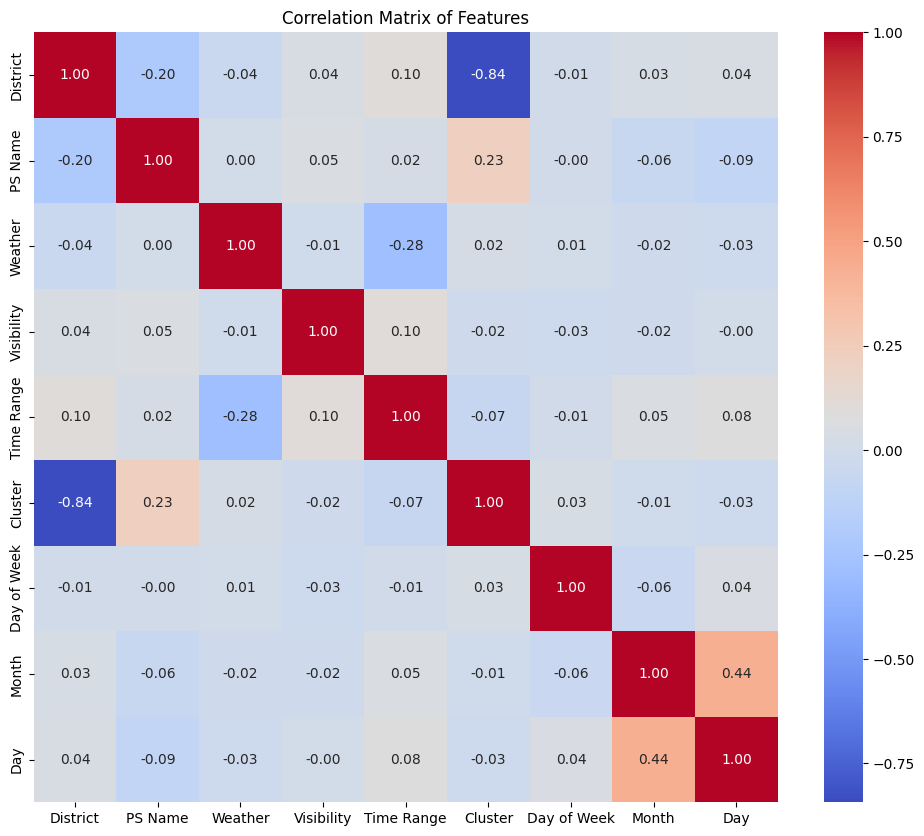

In [ ]:

# Assuming 'data' DataFrame is already created as in the previous code

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:

# Split the data into features (X) and target (y)
X = data.drop('Cluster', axis=1)
y = data['Cluster']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)



Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         5
          14       0.50      1.00      0.67         5
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         8
          21       1.00      0.82      0.90        17
          22       1.00      1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

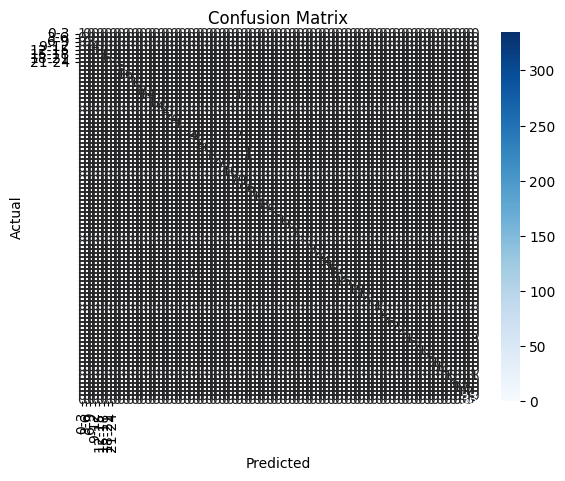


Feature Importances:
 PS Name        0.349596
District       0.173970
Day            0.152565
Time Range     0.108032
Day of Week    0.096462
Weather        0.055677
Month          0.045203
Visibility     0.018495
dtype: float64


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
# Before fitting the XGBoost model
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on all unique values from both train and test
all_unique_labels = np.unique(np.concatenate((y_train, y_test)))
le = LabelEncoder().fit(all_unique_labels)

# Transform y_train and y_test using the fitted LabelEncoder
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Now fit the XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104], got [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         5
          14       0.50      1.00      0.67         5
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         8
          21       1.00      1.00      1.00        17
          22       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

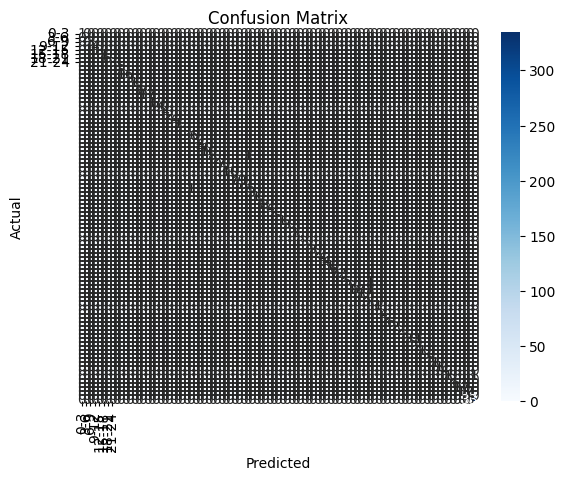


Feature Importance:
     Feature  Importance
1  Feature 2    0.496552
0  Feature 1    0.188248
7  Feature 8    0.118377
5  Feature 6    0.074758
4  Feature 5    0.054048
6  Feature 7    0.039765
2  Feature 3    0.016168
3  Feature 4    0.012083


<ipython-input-73-d910b22168fa>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


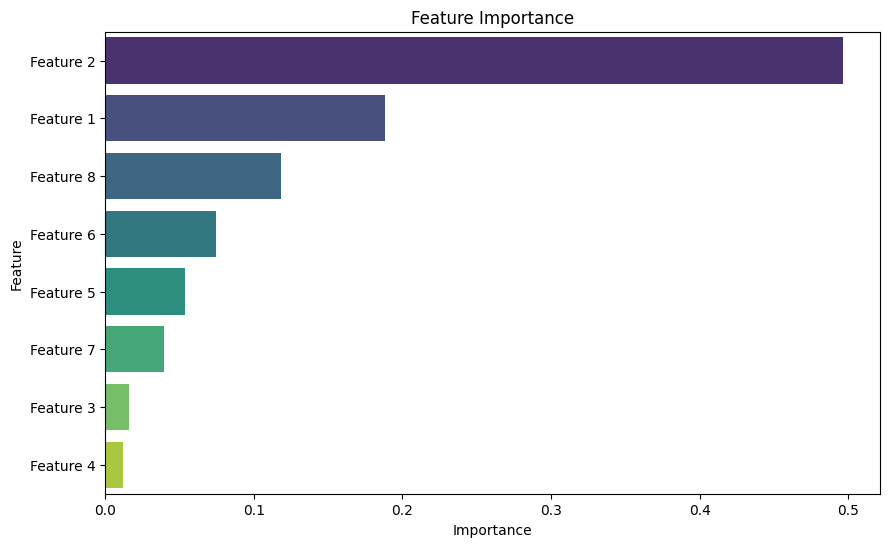

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print feature importance
feature_importance = dt_model.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# prompt: save this decision tree model as TVMmodel.pkl

import pickle
# Save the Decision Tree model
with open('/content/drive/MyDrive/TVMmodel.pkl', 'wb') as file:
  pickle.dump(dt_model, file)

Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.2f}')

# Train the model using the best hyperparameters
best_xgb_clf = grid_search.best_estimator_
best_xgb_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy with Best Hyperparameters: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix for best model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance of the best model
feature_importances = pd.Series(best_xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
